### =====================================================================
### IMPORTACIÓN GENERAL DE LA INFORMACIÓN.
### =====================================================================

In [44]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import descartes
import geopandas as gpd
import json
import requests
import geocoder

# Random Forest.
from sklearn.ensemble import RandomForestRegressor
from shapely.geometry import Point, Polygon
from urllib2 import urlopen

# XGBoost.
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

### =====================================================================
### ALGORITMOS DE MACHINE LEARNING:
### =====================================================================

In [58]:
# LECTURAS DE CSV YA PROCESADOS. 
train = pd.read_csv('DATA/train_procesado.csv') # trainProcesado_precio_v2.csv # train.csv
test = pd.read_csv('DATA/test_procesado.csv') # testProcesado_v2.csv # test.csv

In [59]:
Identificador = pd.DataFrame()
Identificador['id'] = test['id']

In [60]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

train = train.drop('mean', axis = 1)
test = test.drop('mean', axis = 1)

train = train.drop('median', axis = 1)
test = test.drop('median', axis = 1)

train = train.drop('provincia', axis = 1)
test = test.drop('provincia', axis = 1)

train = train.drop('ciudad', axis = 1)
test = test.drop('ciudad', axis = 1)

train = train.drop('tipodepropiedad', axis = 1)
test = test.drop('tipodepropiedad', axis = 1)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 67 columns):
habitaciones                  240000 non-null int64
garages                       240000 non-null int64
banos                         240000 non-null int64
gimnasio                      240000 non-null int64
usosmultiples                 240000 non-null int64
piscina                       240000 non-null int64
escuelascercanas              240000 non-null int64
centroscomercialescercanos    240000 non-null int64
2012                          240000 non-null int64
2013                          240000 non-null int64
2014                          240000 non-null int64
2015                          240000 non-null int64
2016                          240000 non-null int64
precio                        240000 non-null float64
antiguedad_agrupada           240000 non-null int64
metroscubiertos_agrupada      240000 non-null int64
metrostotales_agrupada        240000 non-null int64
ILU

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 66 columns):
habitaciones                  60000 non-null int64
garages                       60000 non-null int64
banos                         60000 non-null int64
gimnasio                      60000 non-null int64
usosmultiples                 60000 non-null int64
piscina                       60000 non-null int64
escuelascercanas              60000 non-null int64
centroscomercialescercanos    60000 non-null int64
2012                          60000 non-null int64
2013                          60000 non-null int64
2014                          60000 non-null int64
2015                          60000 non-null int64
2016                          60000 non-null int64
antiguedad_agrupada           60000 non-null int64
metroscubiertos_agrupada      60000 non-null int64
metrostotales_agrupada        60000 non-null int64
ILUMINADA                     60000 non-null int64
TRANQUILO               

In [63]:
# Resto de los labels.
Y = np.array(train['precio'])
X = train.drop('precio', axis = 1)

In [64]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

### =====================================================================
### Lasso.
### =====================================================================

In [65]:
reg = LassoCV()
reg.fit(trainX, trainY)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

Best alpha using built-in LassoCV: 128290.384369
Best score using built-in LassoCV: 0.368491
Lasso picked 4 variables and eliminated the other 62 variables


Text(0.5,1,'Feature importance con LASSO')

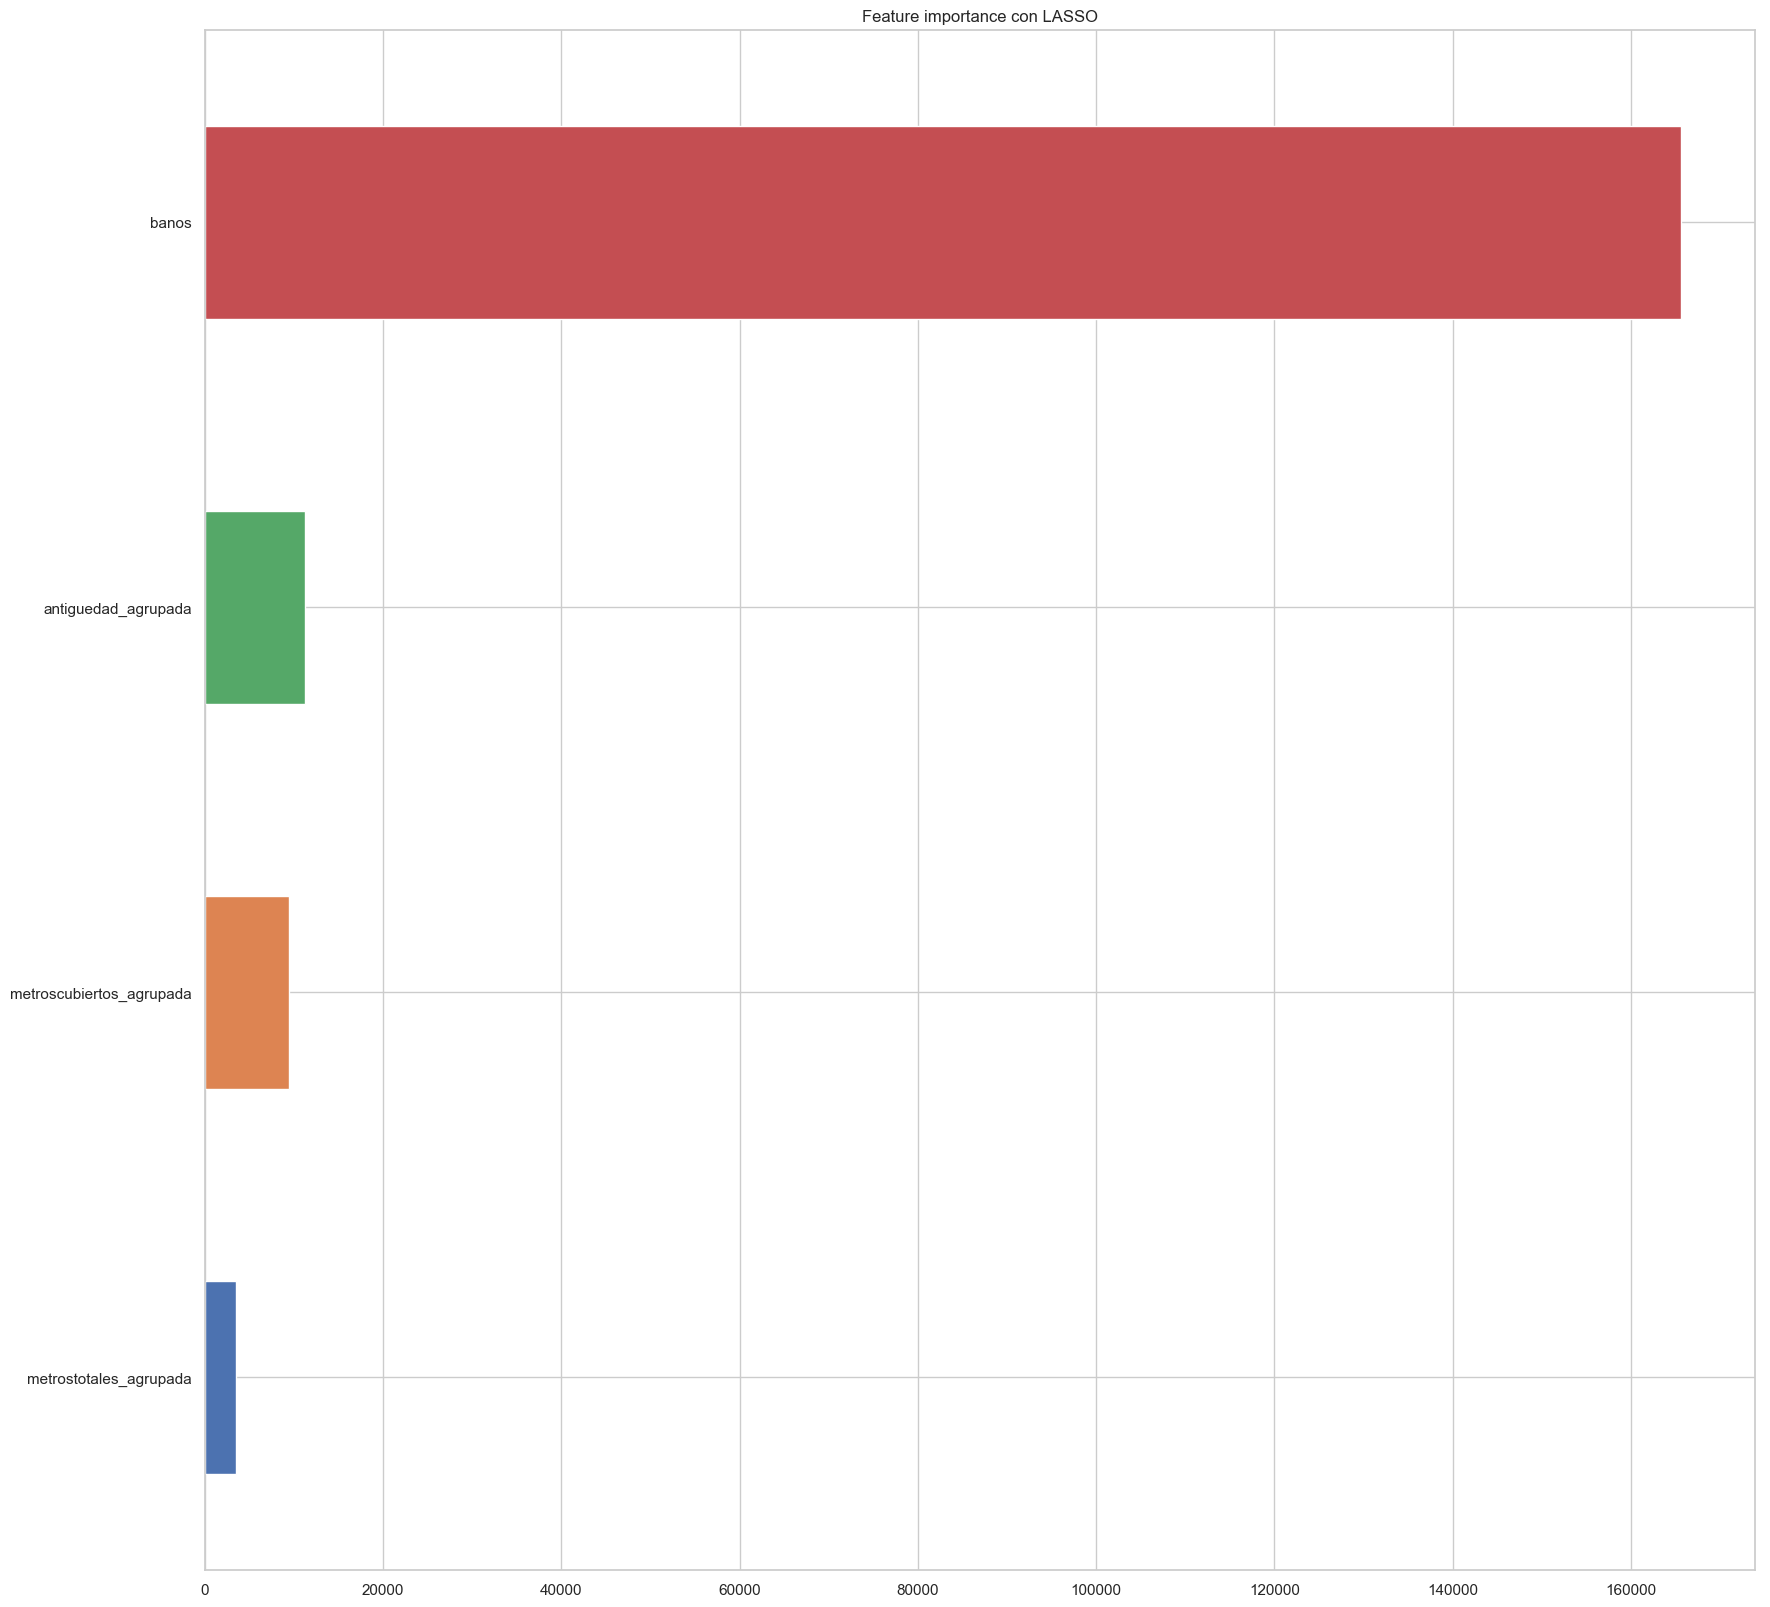

In [66]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(trainX,trainY))
coef = pd.Series(reg.coef_, index = trainX.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef[coef != 0].sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 20)
imp_coef.plot(kind = "barh")
plt.title("Feature importance con LASSO")

In [67]:
y_pred = reg.predict(testX)
# Calculamos el error absoluto.
errors = abs(y_pred - testY)
# Imprimimos el error.
print('Error:', round(np.mean(errors), 2), 'grados.')

('Error:', 1173221.14, 'grados.')


In [68]:
# Calculamos el porcentaje de error.
mape = 100 * (errors / testY)
# Calculate la precisión.
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

('Precision:', 33.45, '%.')


In [69]:
prediccion = reg.predict(test)

In [57]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': Identificador['id'], 'target': prediccion })
submission.to_csv("SUBMITS/010_G34_Lasso.csv", index=False)